Mean Squared Error: 8.833222506400708e-06
R^2 Score: 0.9999927833568049


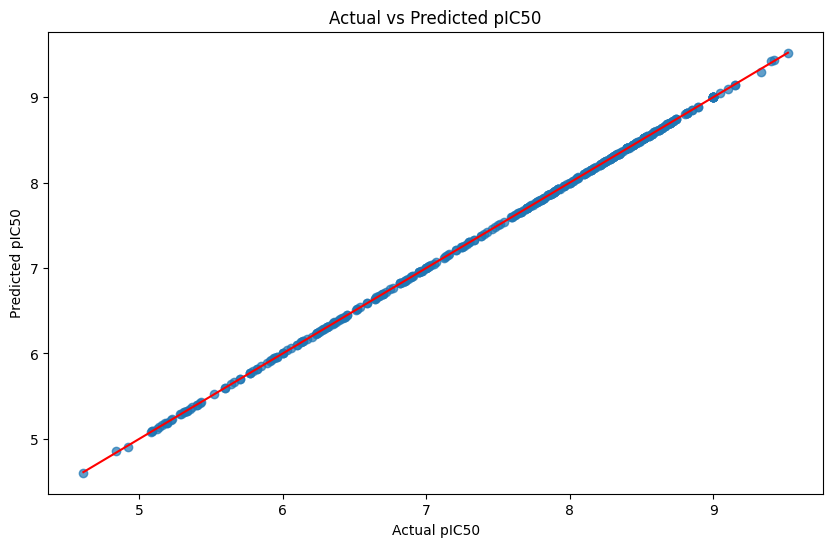

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('./Data/train.csv')

# 특성과 타겟 변수 설정
X = data[['pChEMBL Value', 'IC50_nM']]  # 여기서는 두 변수를 사용합니다. 추가할 수 있습니다.
y = data['pIC50']

# 데이터 분할: 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted pIC50')
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # y=x 선 추가
plt.show()